In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split
import numpy as np




### Business DataFrame

In [2]:
df = pd.read_json('./data/yelp_academic_dataset_business.json', lines=True)
df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",MontrÃ©al,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,None,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,2005 Alyth Place SE,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB


#### Restaurants DataFrame

In [44]:
rst=df[df['categories'].str.contains("Restaurants",na = False)]
rst.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",MontrÃ©al,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
7,"3417 Derry Road E, Unit 103","{'Alcohol': 'none', 'BusinessAcceptsCreditCard...",6OuOZAok8ikONMS_T3EzXg,"Restaurants, Thai",Mississauga,None,1,43.712946,-79.632763,Thai One On,Ridgewood,L4T 1A8,7,2.0,ON
8,1440 N. Dysart Ave,"{'Alcohol': 'none', 'Ambience': '{'romantic': ...",8-NRKkPY1UiFXW20WXKiXg,"Mexican, Restaurants",Avondale,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,33.448106,-112.341302,Filiberto's Mexican Food,,85323,40,2.5,AZ


#### Main columns  of Restaurant DataFrame

In [45]:
 rst1=rst[['name','categories','city','state','review_count','stars']]
 rst1.head()

,name,categories,city,state,review_count,stars
0,Minhas Micro Brewery,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,AB,24,4.0
1,CK'S BBQ & Catering,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,NV,3,4.5
2,La Bastringue,"Breakfast & Brunch, Restaurants, French, Sandw...",MontrÃ©al,QC,5,4.0
7,Thai One On,"Restaurants, Thai",Mississauga,ON,7,2.0
8,Filiberto's Mexican Food,"Mexican, Restaurants",Avondale,AZ,40,2.5


### Toronto Restaurants

In [4]:
rst_toronto=rst1[rst1['city'].str.contains("Toronto",na = False)] #shows only Toronto stores
rst_toronto.head()

,name,categories,city,state,review_count,stars
11,Southern Accent Restaurant,"Cajun/Creole, Southern, Restaurants",Toronto,ON,146,4.0
27,The Coffee Mill Restaurant,"Restaurants, Food, Canadian (New), Coffee & Tea",Toronto,ON,25,3.5
80,Allwyn's Bakery,"Caribbean, Food, Bakeries, Restaurants",Toronto,ON,105,4.0
88,Hub Coffee House & Locavorium,"Restaurants, Food, Coffee & Tea, Breakfast & B...",Toronto,ON,31,4.0
97,Indian Street Food Company,"Nightlife, Wine Bars, Indian, Restaurants, Bars",Toronto,ON,51,3.5


#### Star distribution of Toronto Restaurants

In [39]:
rst_trt_stars=rst_toronto.stars.value_counts().reset_index().sort_values('index',ascending=False) # Toronto resaurants' stars distribution
rst_trt_stars

,index,stars
6,5.0,167
4,4.5,727
1,4.0,1838
0,3.5,2055
2,3.0,1488
3,2.5,730
5,2.0,397
7,1.5,136
8,1.0,42


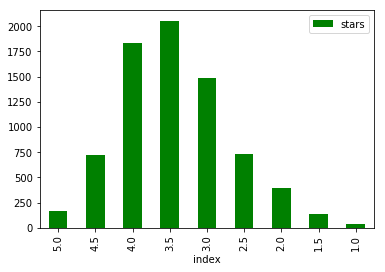

In [40]:
st_idx=rst_trt_stars.set_index('index')
st_idx.plot(kind='bar', color='g') #visualize the distribution of stars

### 5 Star Restaurants in Toronro

In [47]:
list(rst_toronto['stars']).count(5.0)


167

In [49]:
five_toronto=rst_toronto[rst_toronto['stars']==5.0] #shows only 5stars stores.
five_toronto.head(10)

,name,categories,city,state,review_count,stars
285,Galaxy T&T,"Specialty Food, Sandwiches, Juice Bars & Smoot...",Toronto,ON,5,5.0
1813,The Sky Stars,"Burgers, Chicken Wings, Restaurants, Canadian ...",Toronto,ON,3,5.0
4592,Panago Pizza,"Restaurants, Salad, Pizza, Chicken Wings",Toronto,ON,5,5.0
4654,Anima Trattoria and Wine Bar,"Bars, Wine Bars, Nightlife, Italian, Restaurants",Toronto,ON,4,5.0
4857,Le Plato,"Restaurants, African",Toronto,ON,4,5.0
5394,Famous Pizza Town,"Restaurants, Pizza",Toronto,ON,4,5.0
8953,Rosa's Pasta Express,"Fast Food, Restaurants, Italian",Toronto,ON,3,5.0
9196,Horizons Lounge,"Bars, Cafes, Nightlife, Hookah Bars, Restaurants",Toronto,ON,3,5.0
9269,Toffee Cafe,"Restaurants, Sandwiches, Pizza, Food, Coffee &...",Toronto,ON,8,5.0
9403,Chainsmoker,"Food, Specialty Food, Smokehouse, Restaurants,...",Toronto,ON,5,5.0


In [9]:
five_toronto.count()

name            167
categories      167
city            167
state           167
review_count    167
stars           167
dtype: int64

#### Toronto 5 Star Restaurants with Review Count

In [50]:
top_review=five_toronto.sort_values('review_count',ascending=False) #list in the order of review_count
top_review.head(10)

,name,categories,city,state,review_count,stars
126509,Baretto Caffe,"Cafes, Restaurants, Italian",Toronto,ON,224,5.0
126237,New Orleans Seafood & Steakhouse,"Seafood, Cajun/Creole, Steakhouses, Restaurants",Toronto,ON,78,5.0
112396,Zeal Burgers,"Burgers, Restaurants",Toronto,ON,58,5.0
101818,Veghed,"Vegan, Vegetarian, Restaurants",Toronto,ON,55,5.0
52649,Grill Gate,"Restaurants, Burgers, Sandwiches, Canadian (New)",Toronto,ON,48,5.0
53093,Beach Hill Smokehouse,"Restaurants, Barbeque",Toronto,ON,38,5.0
143320,Kal & Mooy,"Specialty Food, African, Restaurants, Food Tru...",Toronto,ON,34,5.0
31818,Wallace Espresso,"Coffee & Tea, Cafes, Restaurants, Food",Toronto,ON,32,5.0
147745,I'll Be Seeing You,"Comfort Food, Restaurants, Nightlife, Wine Bar...",Toronto,ON,28,5.0
99653,Volta Espresso,"Restaurants, Cafes, Coffee & Tea, Food",Toronto,ON,27,5.0


In [11]:
i = top_review['review_count'] #mean of review_count
i.mean()

9.934131736526947

#### Distribution of Reveiw Count

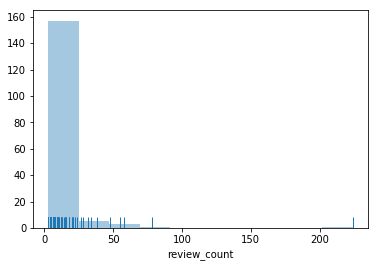

In [12]:
sns.distplot(i, bins=10,kde=False, rug=True);


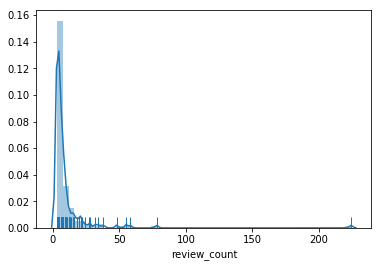

In [13]:
sns.distplot(i, hist=True, rug=True);

## Top 10 cities with Total Review Counts

#### All City List

In [58]:
city=df[['city','state','review_count','stars']]
city.head(20)

,city,state,review_count,stars
0,Calgary,AB,24,4.0
1,Henderson,NV,3,4.5
2,MontrÃ©al,QC,5,4.0
3,Phoenix,AZ,8,1.5
4,Calgary,AB,4,2.0
5,Phoenix,AZ,63,4.0
6,Toronto,ON,7,4.0
7,Mississauga,ON,7,2.0
8,Avondale,AZ,40,2.5
9,Pittsburgh,PA,3,3.5


In [59]:
city=df[['city','state','review_count','stars']]
cities=city.drop_duplicates('city')
#cities.set_index('city')
cities.head(10)

,city,state,review_count,stars
0,Calgary,AB,24,4.0
1,Henderson,NV,3,4.5
2,MontrÃ©al,QC,5,4.0
3,Phoenix,AZ,8,1.5
6,Toronto,ON,7,4.0
7,Mississauga,ON,7,2.0
8,Avondale,AZ,40,2.5
9,Pittsburgh,PA,3,3.5
10,Markham,ON,12,1.5
17,Las Vegas,NV,4,4.0


In [60]:
cities.count()

city            1111
state           1111
review_count    1111
stars           1111
dtype: int64

### Top 10 cities with best review_count

In [61]:
city_review=city.groupby(['city','state']).review_count.sum().reset_index().sort_values('review_count',ascending=False)
city_review.head(10)

,city,state,review_count
447,Las Vegas,NV,1825336
748,Phoenix,AZ,659850
1038,Toronto,ON,474770
922,Scottsdale,AZ,351139
168,Charlotte,NC,273828
774,Pittsburgh,PA,201613
353,Henderson,NV,194797
1019,Tempe,AZ,182603
553,Mesa,AZ,154269
163,Chandler,AZ,141088


### Star Distribution for All Cities

In [20]:
stars=df['stars']
stars1=np.unique(df['stars'])
stars1

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [21]:
stars.value_counts().sort_index()

1.0     4343
1.5     4727
2.0    10266
2.5    17808
3.0    24704
3.5    33974
4.0    35123
4.5    26707
5.0    30941
Name: stars, dtype: int64

In [22]:
rst1.head(10)

,name,categories,city,state,review_count,stars
0,Minhas Micro Brewery,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,AB,24,4.0
1,CK'S BBQ & Catering,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,NV,3,4.5
2,La Bastringue,"Breakfast & Brunch, Restaurants, French, Sandw...",MontrÃ©al,QC,5,4.0
7,Thai One On,"Restaurants, Thai",Mississauga,ON,7,2.0
8,Filiberto's Mexican Food,"Mexican, Restaurants",Avondale,AZ,40,2.5
10,Sushi 8,"Restaurants, Japanese",Markham,ON,12,1.5
11,Southern Accent Restaurant,"Cajun/Creole, Southern, Restaurants",Toronto,ON,146,4.0
12,Original Hamburger Works,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",Phoenix,AZ,277,4.0
13,Mysore Indian Cuisine,"Restaurants, Pakistani, Indian, Middle Eastern",MontrÃ©al,QC,19,3.5
15,Safeway Food & Drug,"Delis, Restaurants, Sandwiches",Calgary,AB,4,2.5


In [23]:
df5=cities.stars.value_counts().reset_index().sort_values('index',ascending=False)
df5

,index,stars
3,5.0,180
2,4.5,182
0,4.0,210
1,3.5,194
4,3.0,132
5,2.5,103
6,2.0,66
8,1.5,19
7,1.0,25


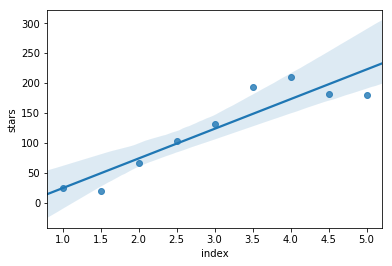

In [24]:
sns.regplot(x="index", y="stars", data=df5)


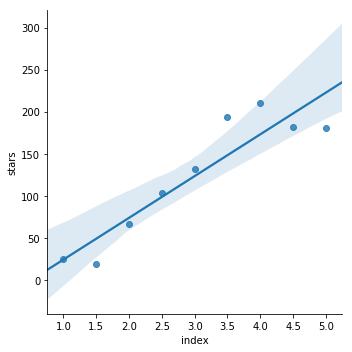

In [25]:
sns.lmplot(x="index", y="stars", data=df5)

In [26]:
pd.DataFrame(rst1, columns=stars1)

,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
